In [2]:
from __future__ import division
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pickle
import glob

In [4]:
size = 7737578
count = 2402105

In [5]:
size = 0
#types = [["NuECC", 0],["NuENC", 1],["NuMuCC", 2],["NuMuNC", 3],["NuTauCC", 4],["NuTauNC", 5]]
types = [["NuTauCC", 4]]

for t in types:
    for name in glob.glob('/home/dup193/work/double_pulse/data/Nu_all/'+t[0]+'*_info.pkl'):
        x = np.load(name, mmap_mode="r",allow_pickle=True)
        print(name, len(x), t[1])
        size = size +len(x)
print(size)

/home/dup193/work/double_pulse/data/Nu_all/NuTauCC_Qtot2000_Qst600_7_000062_info.pkl 7777 4
/home/dup193/work/double_pulse/data/Nu_all/NuTauCC_Qtot2000_Qst600_11_000108_info.pkl 7553 4
/home/dup193/work/double_pulse/data/Nu_all/NuTauCC_Qtot2000_Qst600_9_000084_info.pkl 7630 4
/home/dup193/work/double_pulse/data/Nu_all/NuTauCC_Qtot2000_Qst600_6_000055_info.pkl 7542 4
/home/dup193/work/double_pulse/data/Nu_all/NuTauCC_Qtot2000_Qst600_12_000114_info.pkl 7446 4
/home/dup193/work/double_pulse/data/Nu_all/NuTauCC_Qtot2000_Qst600_7_000063_info.pkl 7651 4
/home/dup193/work/double_pulse/data/Nu_all/NuTauCC_Qtot2000_Qst600_8_000079_info.pkl 7688 4
/home/dup193/work/double_pulse/data/Nu_all/NuTauCC_Qtot2000_Qst600_12_000112_info.pkl 7784 4
/home/dup193/work/double_pulse/data/Nu_all/NuTauCC_Qtot2000_Qst600_10_000094_info.pkl 7577 4
/home/dup193/work/double_pulse/data/Nu_all/NuTauCC_Qtot2000_Qst600_2_000011_info.pkl 7561 4
/home/dup193/work/double_pulse/data/Nu_all/NuTauCC_Qtot2000_Qst600_2_000016_

In [7]:
x = np.load('/home/dup193/work/double_pulse/data/Nu_all/NuTauCC_Qtot2000_Qst600_6_000054_info.pkl', mmap_mode="r",allow_pickle=True)
print(x[:10])    

[{'index': 0, 'tau_length': 2.4393672788914165, 'tau_position': (117.83552328101678, 164.24011847405836, -474.2186773723515), 'qtotal': 2704.6750046852976, 'tau_energy': 25173.176463841188, 'strings': {'charge': 1093.5500027388334, 'doms': array([{'dom_position': (90.48999786376953, 82.3499984741211, -247.25), 'key': (46, 45), 'qdom': 0.625},
       {'dom_position': (90.48999786376953, 82.3499984741211, -264.2699890136719), 'key': (46, 46), 'qdom': 1.5499999523162842},
       {'dom_position': (90.48999786376953, 82.3499984741211, -281.2900085449219), 'key': (46, 47), 'qdom': 2.25},
       {'dom_position': (90.48999786376953, 82.3499984741211, -298.30999755859375), 'key': (46, 48), 'qdom': 2.0},
       {'dom_position': (90.48999786376953, 82.3499984741211, -315.3299865722656), 'key': (46, 49), 'qdom': 2.4499999284744263},
       {'dom_position': (90.48999786376953, 82.3499984741211, -332.3500061035156), 'key': (46, 50), 'qdom': 9.049999952316284},
       {'dom_position': (90.48999786376

In [9]:
#arr = np.load('/fastio2/dasha/double_pulse/nu_data.npy', mmap_mode = 'r')
arr = np.memmap('/fastio2/dasha/double_pulse/nu_data.npy', mode = 'r', dtype ='float32', shape=(size,300,60))


In [13]:
arr.bites

AttributeError: 'memmap' object has no attribute 'bites'

In [ ]:
pos = 0
nu_info = np.memmap('/fastio2/dasha/double_pulse/nu_info.npy', mode = 'w+', dtype ='float32', shape=(size,3))

types = [["NuECC", 0],["NuENC", 1],["NuMuCC", 2],["NuMuNC", 3],["NuTauCC", 4],["NuTauNC", 5]]
for t in types:
    for name in glob.glob('/home/dup193/work/double_pulse/data/Nu_all/'+t[0]+'*_info.pkl'):
        x = np.load(name, mmap_mode="r",allow_pickle=True)
        for i in x:
            arr = [i['tau_energy'], i['qtotal'], i['strings']['charge']]
            arr = np.array(arr)
            arr = np.float32(arr)
            nu_info[pos:pos+1] = arr
            pos = pos + 1

In [181]:
nu_info = np.memmap('/fastio2/dasha/double_pulse/nu_info.npy', mode = 'r', dtype ='float32', shape=(size,3))
count = 0
for i in nu_info:
    if i[1]> 10000 and i[2]> 5000:
        count = count +1
print(count)

2402105


In [6]:
nu_info_sm = np.memmap('/fastio2/dasha/double_pulse/nu_info_qs5000_qt10000.npy', mode = 'w+', dtype ='float32', shape=(count,3))
nu_info = np.memmap('/fastio2/dasha/double_pulse/nu_info.npy', mode = 'r', dtype ='float32', shape=(size,3))
pos =0
for i in nu_info:
    if i[1]> 10000 and i[2]> 5000:
        nu_info_sm[pos:pos+1] = i
        pos = pos +1

In [183]:
nu_data_sm = np.memmap('/fastio2/dasha/double_pulse/nu_data_qs5000_qt10000.npy', mode = 'w+', dtype ='float32', shape=(count,300,60))
nu_label_sm = np.memmap('/fastio2/dasha/double_pulse/nu_label_qs5000_qt10000.npy', mode = 'w+', dtype ='float32', shape=count)
nu_data = np.memmap('/fastio2/dasha/double_pulse/nu_data.npy', mode = 'r', dtype ='float32', shape=(size,300,60))
nu_label = np.memmap('/fastio2/dasha/double_pulse/nu_label.npy', mode = 'r', dtype ='float32', shape=size)
pos = 0
for i,inf in enumerate(nu_info):
    if inf[1]> 10000 and inf[2]> 5000:
        nu_data_sm[pos:pos+1] = nu_data[i]
        nu_label_sm[pos:pos+1] = nu_label[i]
        pos = pos + 1

In [57]:
def GetEnergy(en_arr, qt_arr, qs_arr, ptype):
    for name in glob.glob('/home/dup193/work/double_pulse/data/Nu_all/'+ptype+'*_info.pkl'):
        data = np.load(name, mmap_mode="r", allow_pickle=True)
        for i in data:
            en_arr.append(i['tau_energy'])
            qt_arr.append(i['qtotal'])
            qs_arr.append(i['strings']['charge'])
            
            #n_arr.append(en)
    return   

In [58]:
en_e_cc = []
qt_e_cc = []
qs_e_cc = []
GetEnergy(en_e_cc,qt_e_cc,qs_e_cc,"NuECC")
print(len(en_e_cc), len(qt_e_cc),len(qs_e_cc))
en_e_cc = np.array(en_e_cc)
qt_e_cc = np.array(qt_e_cc)
qs_e_cc = np.array(qs_e_cc)    

2885285 2885285 2885285


In [59]:
en_e_nc = []
qt_e_nc = []
qs_e_nc = []
GetEnergy(en_e_nc,qt_e_nc,qs_e_nc,"NuENC")
print(len(en_e_nc), len(qt_e_nc),len(qs_e_nc))
en_e_nc = np.array(en_e_nc)
qt_e_nc = np.array(qt_e_nc)
qs_e_nc = np.array(qs_e_nc)    

441544 441544 441544


In [60]:
en_m_cc = []
qt_m_cc = []
qs_m_cc = []
GetEnergy(en_m_cc,qt_m_cc,qs_m_cc,"NuMuCC")
print(len(en_m_cc), len(qt_m_cc),len(qs_m_cc))
en_m_cc = np.array(en_m_cc)
qt_m_cc = np.array(qt_m_cc)
qs_m_cc = np.array(qs_m_cc)    

2960557 2960557 2960557


In [61]:
en_m_nc = []
qt_m_nc = []
qs_m_nc = []
GetEnergy(en_m_nc,qt_m_nc,qs_m_nc,"NuMuNC")
print(len(en_m_nc), len(qt_m_nc),len(qs_m_nc))
en_m_nc = np.array(en_m_nc)
qt_m_nc = np.array(qt_m_nc)
qs_m_nc = np.array(qs_m_nc)    

370980 370980 370980


In [63]:
en_t_cc = []
qt_t_cc = []
qs_t_cc = []
GetEnergy(en_t_cc,qt_t_cc,qs_t_cc,"NuTauCC")
print(len(en_t_cc), len(qt_t_cc),len(qs_t_cc))
en_t_cc = np.array(en_t_cc)
qt_t_cc = np.array(qt_t_cc)
qs_t_cc = np.array(qs_t_cc)    

909096 909096 909096


In [62]:
en_t_nc = []
qt_t_nc = []
qs_t_nc = []
GetEnergy(en_t_nc,qt_t_nc,qs_t_nc,"NuTauNC")
print(len(en_t_nc), len(qt_t_nc),len(qs_t_nc))
en_t_nc = np.array(en_t_nc)
qt_t_nc = np.array(qt_t_nc)
qs_t_nc = np.array(qs_t_nc)    

170116 170116 170116


In [78]:
def Plot(arr1, name, bs =100, r = [100,100000], lab = "Energy, GeV", scale = "linear"):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
    weights1 = np.ones_like(arr1)/float(len(arr1))
    ax.set_xscale(scale)
    ax.set_yscale('log')
    ax.set_title(name, fontsize = 14)
    ax.text(0.5,0.95,'#Events '+str(len(arr1)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.set_xlabel(lab, fontsize = 14)                                                              
    ax.set_ylabel("FractionEvents", fontsize = 14)                                                   
    ax.hist(arr1, bins =bs, weights= weights1, range = r, histtype = 'step',edgecolor ='r', fill= False,)  

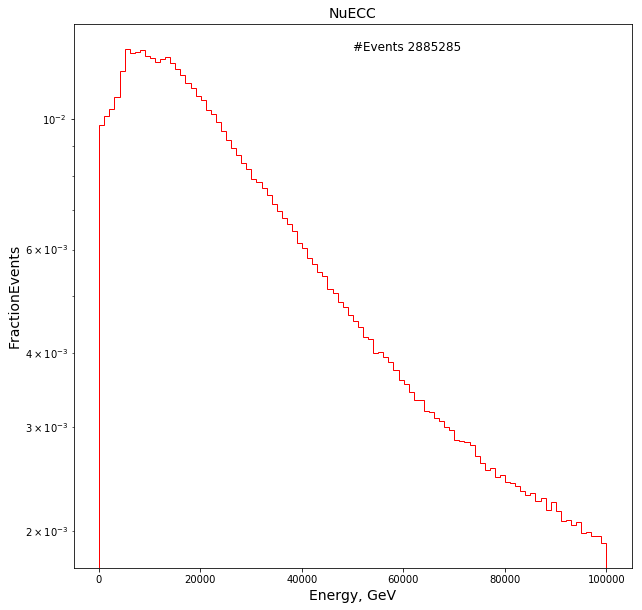

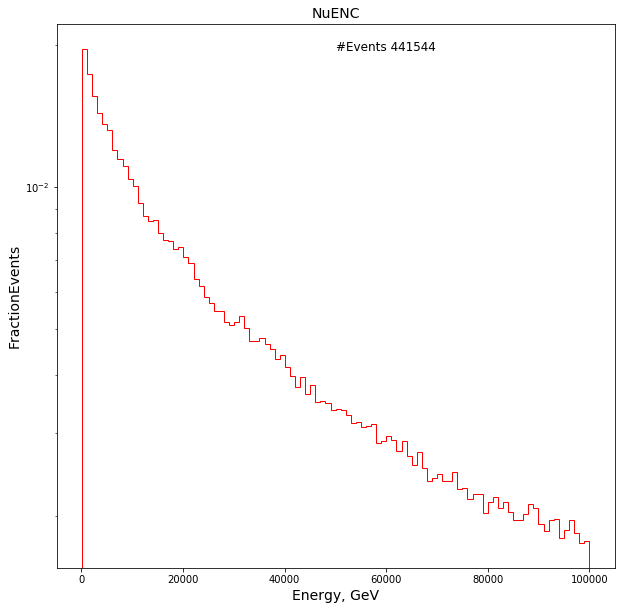

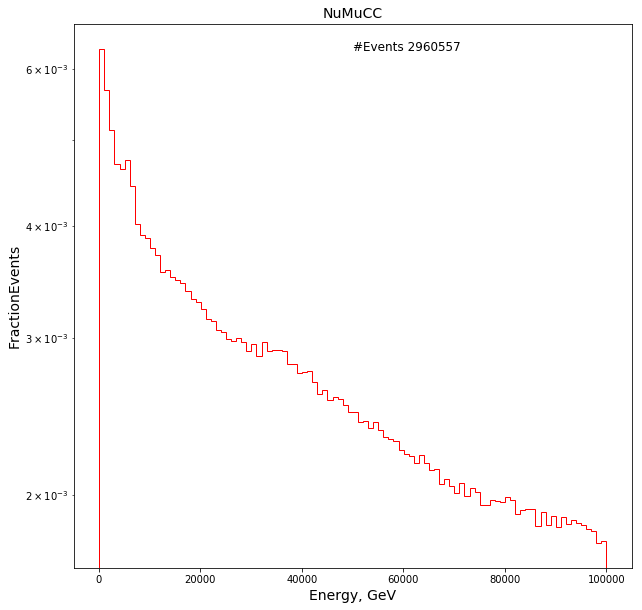

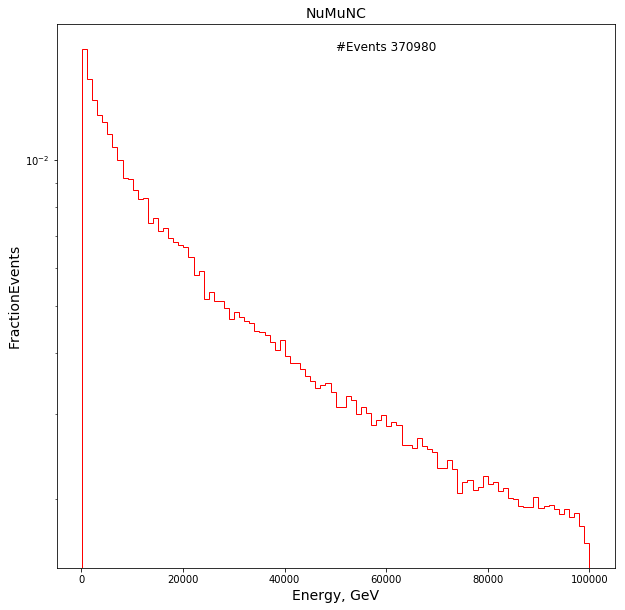

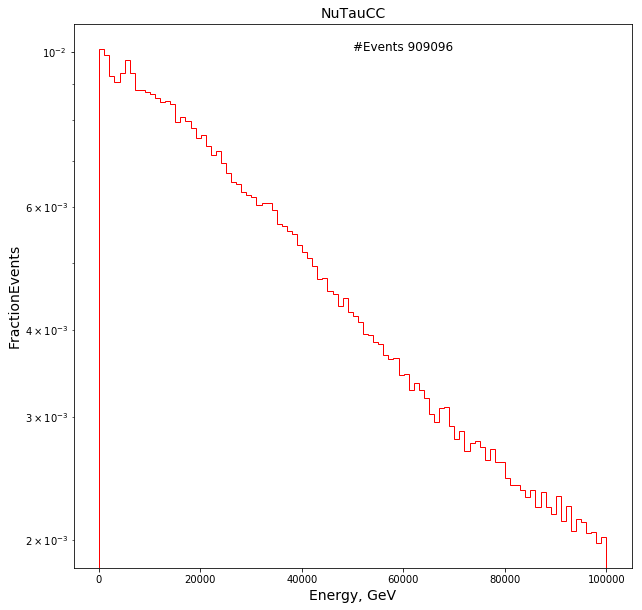

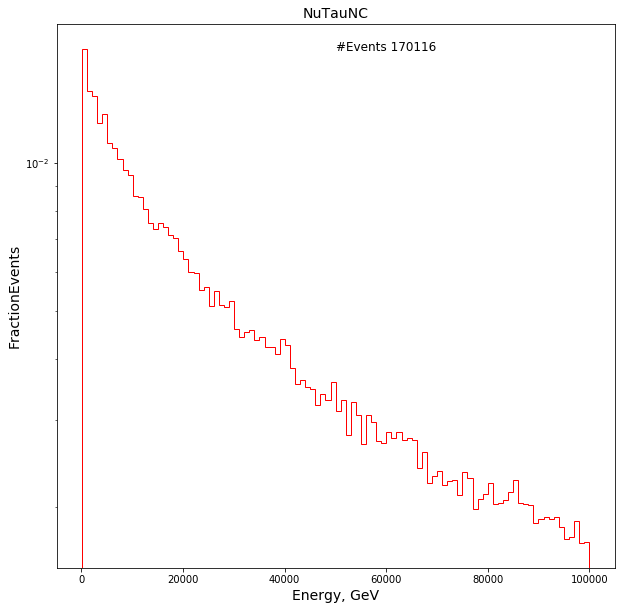

In [79]:
Plot(en_e_cc, 'NuECC')
Plot(en_e_nc, 'NuENC')
Plot(en_m_cc, 'NuMuCC')
Plot(en_m_nc, 'NuMuNC')
Plot(en_t_cc, 'NuTauCC')
Plot(en_t_nc, 'NuTauNC')


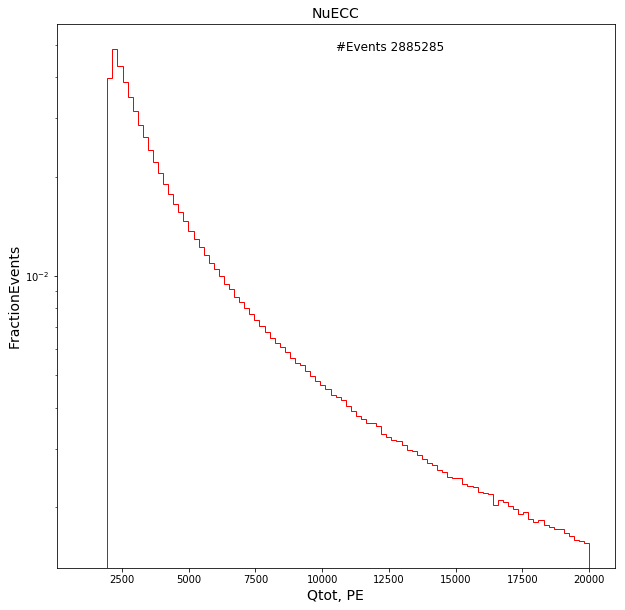

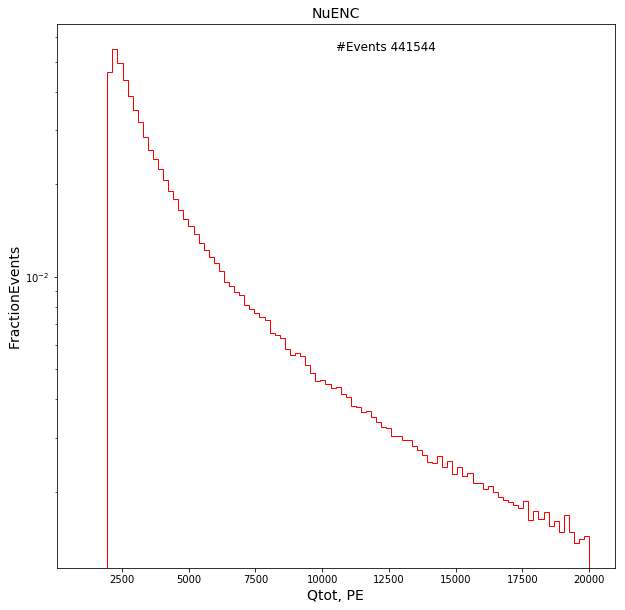

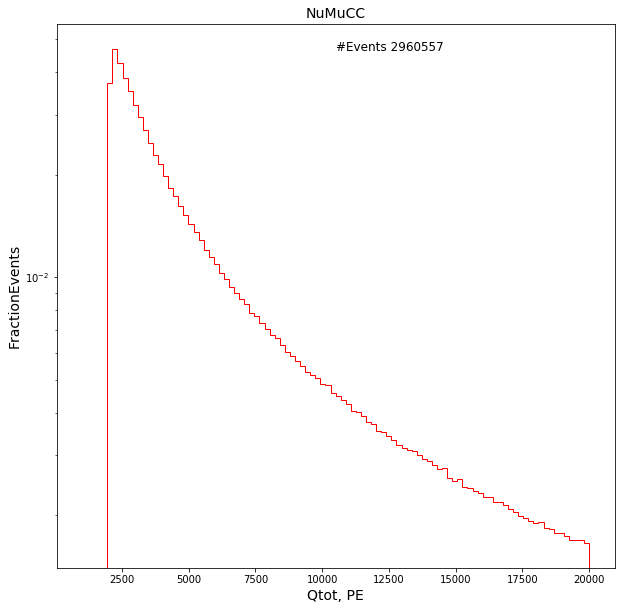

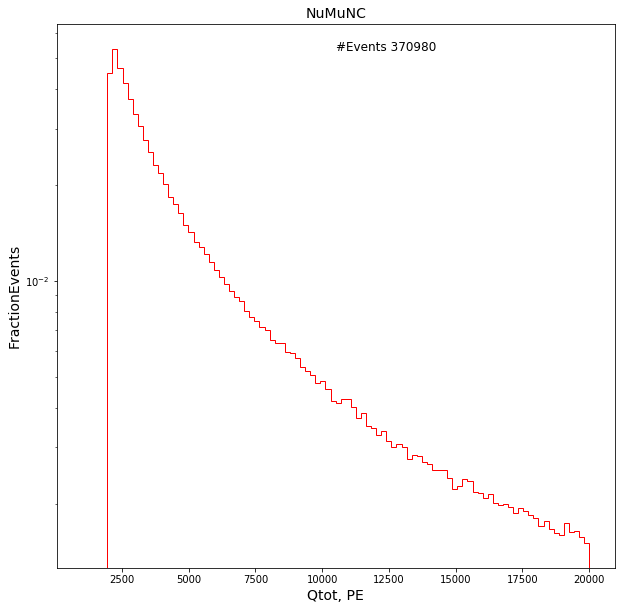

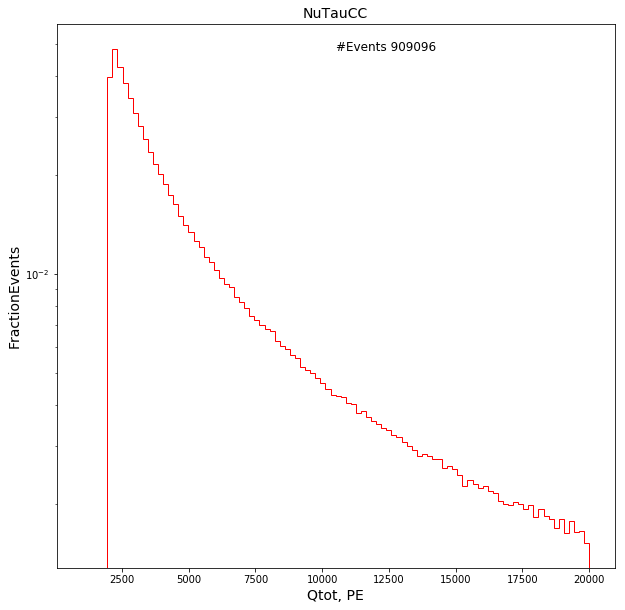

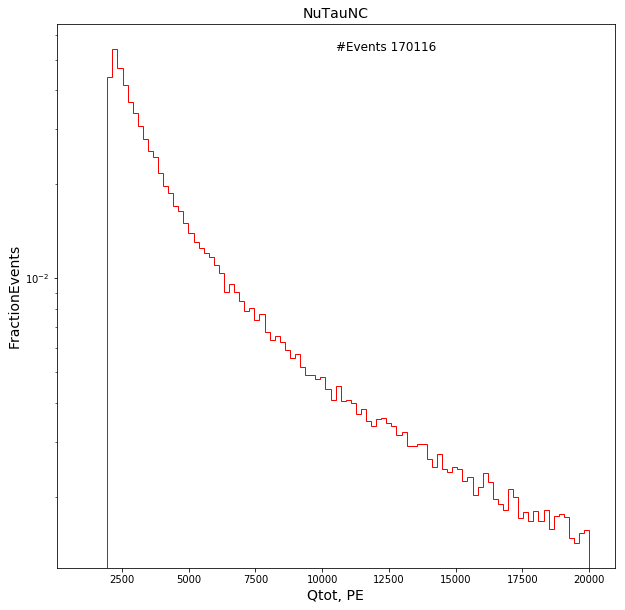

In [80]:
Plot(qt_e_cc, 'NuECC', r= [1000, 20000], lab = "Qtot, PE", scale = 'linear')
Plot(qt_e_nc, 'NuENC', r= [1000, 20000], lab = "Qtot, PE", scale = 'linear')
Plot(qt_m_cc, 'NuMuCC', r= [1000, 20000], lab = "Qtot, PE", scale = 'linear')
Plot(qt_m_nc, 'NuMuNC', r= [1000, 20000], lab = "Qtot, PE", scale = 'linear')
Plot(qt_t_cc, 'NuTauCC', r= [1000, 20000], lab = "Qtot, PE", scale = 'linear')
Plot(qt_t_nc, 'NuTauNC', r= [1000, 20000], lab = "Qtot, PE", scale = 'linear')

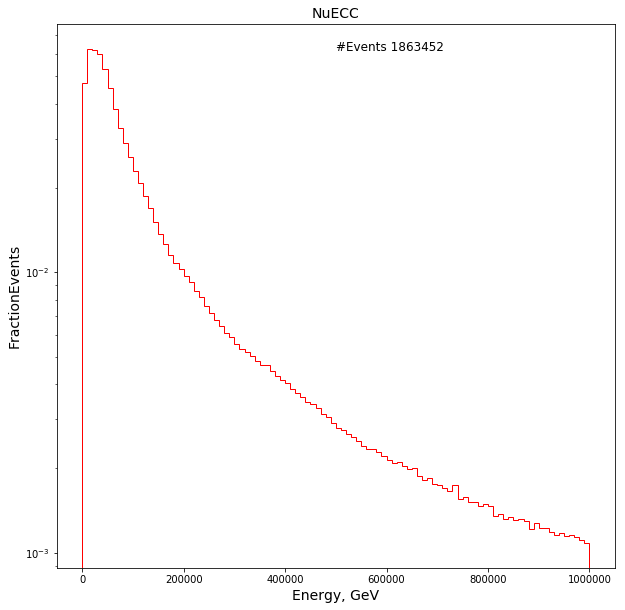

In [81]:
Plot(new_en_e_cc, 'NuECC', r= [0, 1000000], scale = 'linear')

In [82]:
new_en_e_cc = []
for i, qt in enumerate(qt_e_cc):
    if qt > 4000:
        new_en_e_cc.append(en_e_cc[i])
new_en_e_cc = np.array(new_en_e_cc)

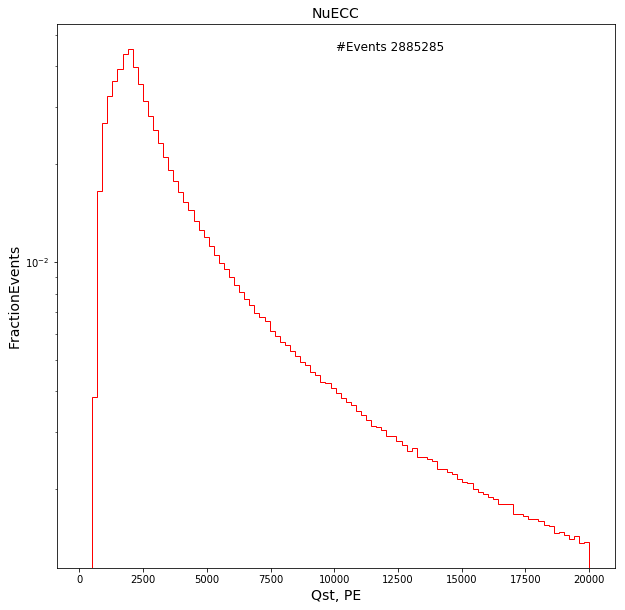

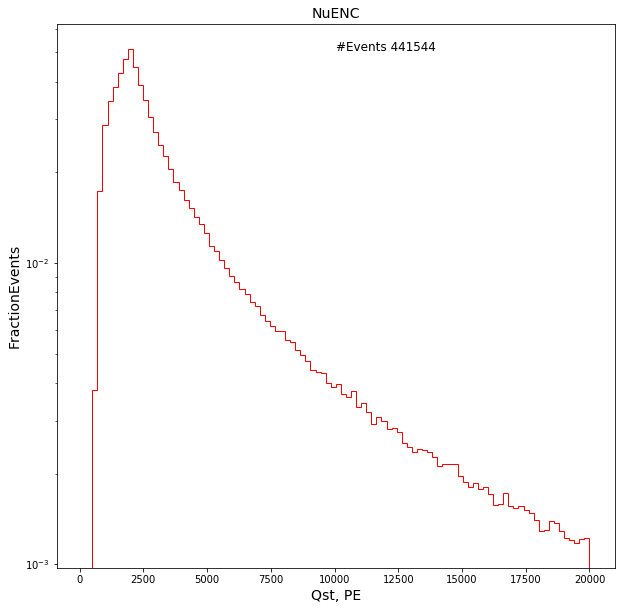

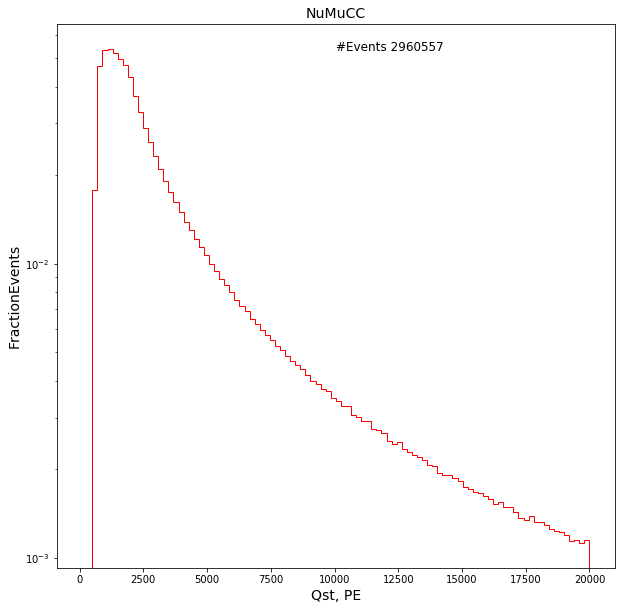

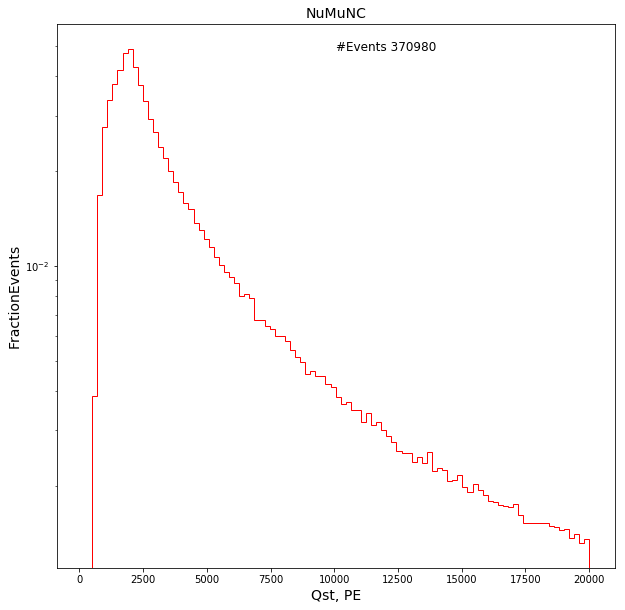

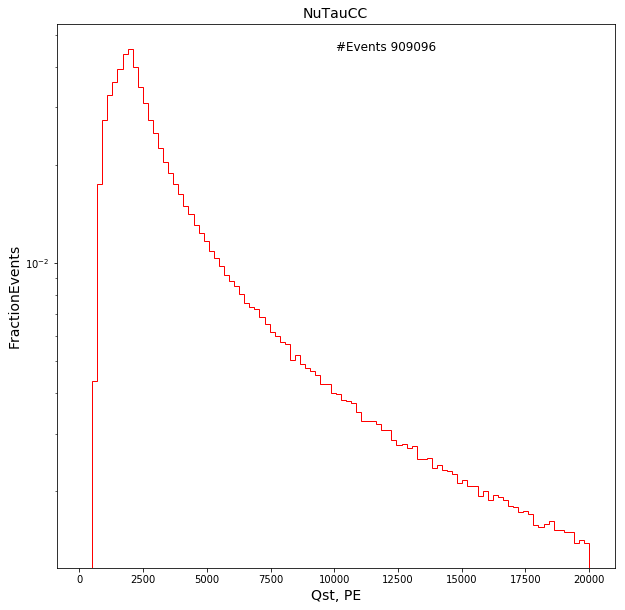

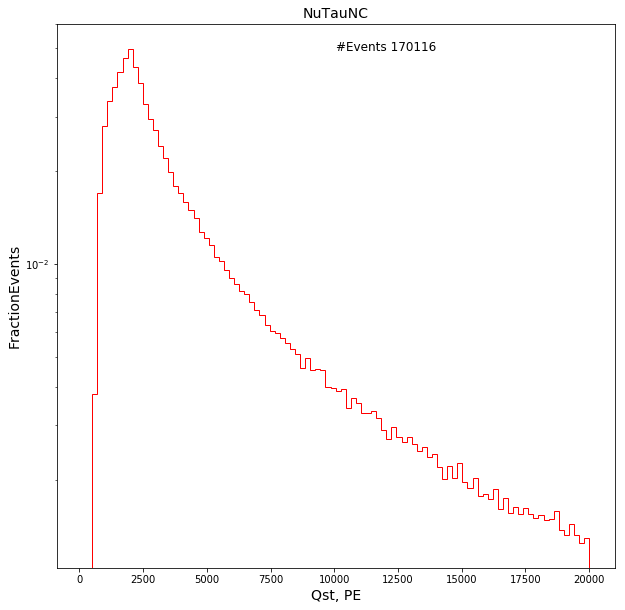

In [83]:
Plot(qs_e_cc, 'NuECC', r= [100, 20000], lab = "Qst, PE", scale = 'linear')
Plot(qs_e_nc, 'NuENC', r= [100, 20000], lab = "Qst, PE", scale = 'linear')
Plot(qs_m_cc, 'NuMuCC', r= [100, 20000], lab = "Qst, PE", scale = 'linear')
Plot(qs_m_nc, 'NuMuNC', r= [100, 20000], lab = "Qst, PE", scale = 'linear')
Plot(qs_t_cc, 'NuTauCC', r= [100, 20000], lab = "Qst, PE", scale = 'linear')
Plot(qs_t_nc, 'NuTauNC', r= [100, 20000], lab = "Qst, PE", scale = 'linear')

In [157]:
def Plot2(arr1, arr2, arr3, name, bs =100, r = [1000,1000000], lab = "Energy, GeV", scale = "linear"):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
   # plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
    weights1 = np.ones_like(arr1)/float(len(arr1))
    weights2 = np.ones_like(arr2)/float(len(arr2))
    weights3 = np.ones_like(arr3)/float(len(arr3))
    
    #ax.set_xscale(scale)
    #ax.set_yscale('log')
    ax.set_title(name, fontsize = 14)
    ax.text(0.5,0.95,'#Events '+str(len(arr1)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.text(0.5,0.90,'#Events '+str(len(arr2)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.text(0.5,0.85,'#Events '+str(len(arr3)), transform=ax.transAxes, color = "black",fontsize=12)
    
    ax.set_xlabel(lab, fontsize = 14)                                                                                                                           
    #ax.set_ylabel("FractionEvents", fontsize = 14)                                                   
    ax.hist(arr1, bins =bs, range = r, histtype = 'step',edgecolor ='r', fill= False)  
    ax.hist(arr2, bins =bs, range = r, histtype = 'step',edgecolor ='b', fill= False)  
    ax.hist(arr3, bins =bs, range = r, histtype = 'step',edgecolor ='g', fill= False)  

In [176]:
new_qt_t_cc = []
new_en_t_cc = []
new2_qt_t_cc = []
new2_en_t_cc = []
for i, qs in enumerate(qs_t_cc):
    qt = qt_t_cc[i]
    if (qs > 5000) and (qt > 10000):
        new_qt_t_cc.append(qt_t_cc[i])
        new_en_t_cc.append(en_t_cc[i])
    else:
        new2_qt_t_cc.append(qt_t_cc[i])
        new2_en_t_cc.append(en_t_cc[i])

new_qt_t_cc = np.array(new_qt_t_cc)
new_en_t_cc = np.array(new_en_t_cc)
new2_qt_t_cc = np.array(new2_qt_t_cc)
new2_en_t_cc = np.array(new2_en_t_cc)

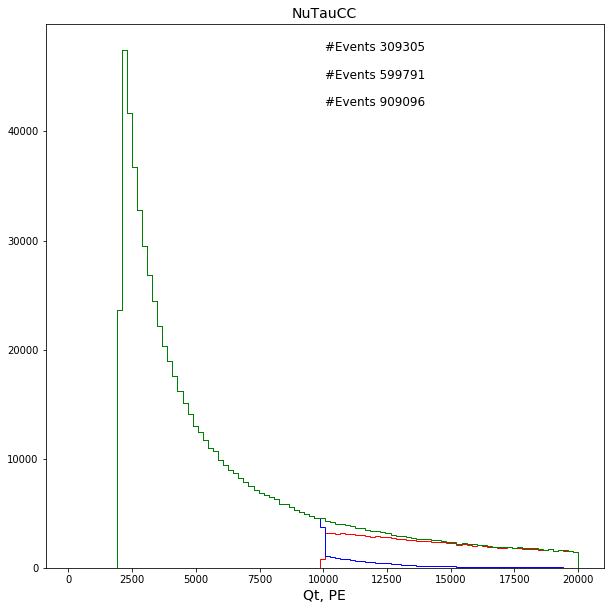

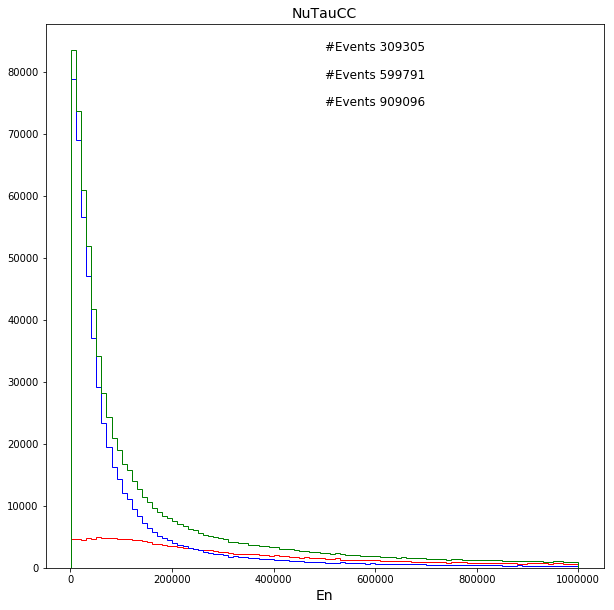

In [177]:
Plot2(new_qt_t_cc, new2_qt_t_cc, qt_t_cc, 'NuTauCC', r= [100, 20000], lab = "Qt, PE", scale = 'linear')
Plot2(new_en_t_cc, new2_en_t_cc, en_t_cc, 'NuTauCC', r= [1000, 1000000], lab = "En", scale = 'linear')


In [119]:
def Plot2d(arr1, arr2, name, bs =[100,100], r = [[1000,1000000],[500,50000]], labx = "Energy, GeV", laby = "Qt, PE", scale = "linear"):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
   # plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
    #weights1 = np.ones_like(arr1)/float(len(arr1))
    #ax.set_xscale(scale)
    #ax.set_yscale('log')
    ax.set_title(name, fontsize = 14)
    ax.text(0.5,0.95,'#Events '+str(len(arr1)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.set_xlabel(labx, fontsize = 14)                                                              
    ax.set_ylabel(laby, fontsize = 14)                                                              
    #ax.set_ylabel("FractionEvents", fontsize = 14)                                                   
    ax.hist2d(arr1, arr2, bins =bs, range = r,norm=mpl.colors.LogNorm())  

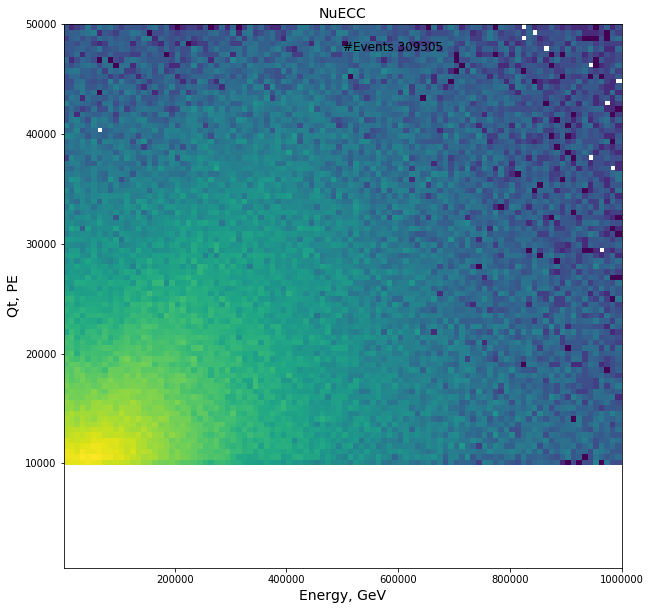

In [180]:
Plot2d(new_en_t_cc, new_qt_t_cc, 'NuECC')
#Plot2d(new_en_t_cc, new_qs_t_cc, 'NuECC', laby = "Qs, PE", )